In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# load the dataset
df = pd.read_csv('book_descriptions_with_labels.csv')
df.head()                 

,title,author,description,microgenre
0,The Broken Garden,Silas Heart,"In a bustling city, Juno Fen finds unexpected ...",Wholesome Contemporary Romance
1,The Fading Dream,Omar Heart,Samir Marrow embarks on a journey through time...,Philosophical Sci-Fi
2,The Shattered Ashes,Fenwick Sterling,Silas Heart and a rival captain find love amon...,Romantic Space Opera
3,The Dark Memory,Samir Vance,"In a brutal realm, Omar Wren must survive betr...",Grimdark Fantasy
4,The Dark Garden,Helen Locke,Omar Marrow embarks on a journey through time ...,Philosophical Sci-Fi


In [4]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['description'])

In [5]:
# KMeans Clustering
num_clusters = 11 # you could easily as well fit 11 as the argument for the n_clusters under KMeans...
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

In [6]:
# reducing dimensions to 2D using PCA
pca_reduction = PCA(n_components=2, random_state=42)
X_reduced = pca_reduction.fit_transform(X.toarray())

In [7]:
# a quick look around of the clusters (the unlabeled microgenres)
for cluster_num in range(num_clusters):
    print(f"\nCluster {cluster_num}")
    sample = df[df['cluster'] == cluster_num].sample(5, random_state=42)
    print(sample[['title', 'description']])


Cluster 0
                 title                                        description
347      The Lost Song  Amidst the rise and fall of dynasties, Lila Mo...
25      The Lost River  Amidst the rise and fall of dynasties, Silas M...
578  The Fading Secret  Amidst the rise and fall of dynasties, Clariss...
76   The Shattered Sky  Amidst the rise and fall of dynasties, Fenwick...
645    The Silent Song  Amidst the rise and fall of dynasties, Avery H...

Cluster 1
                 title                                        description
18      The Hidden Sky  Avery Vance embarks on a journey through time ...
685  The Fading Secret  Helen Fen embarks on a journey through time an...
154   The Broken Dream  Juno Graves embarks on a journey through time ...
1     The Fading Dream  Samir Marrow embarks on a journey through time...
303  The Fading Secret  Omar Vale embarks on a journey through time an...

Cluster 2
                   title                                        description
262

In [8]:
# Build dictionary mapping cluster number → dominant microgenre
cluster_to_microgenre = {}
for cluster_num in range(num_clusters):
    dominant = df[df['cluster'] == cluster_num]['microgenre'].value_counts().idxmax()
    cluster_to_microgenre[cluster_num] = dominant

In [9]:
# now to  include the microgenres too
for cluster_num in range(num_clusters):
    dominant_microgenre = cluster_to_microgenre[cluster_num]
    print(f"\nCluster {cluster_num} (Predicted Microgenre: {dominant_microgenre})")
    sample = df[df['cluster'] == cluster_num].sample(5, random_state=42)
    print(sample[['title', 'description', 'microgenre']])  


Cluster 0 (Predicted Microgenre: Historical Political Drama)
                 title                                        description  \
347      The Lost Song  Amidst the rise and fall of dynasties, Lila Mo...   
25      The Lost River  Amidst the rise and fall of dynasties, Silas M...   
578  The Fading Secret  Amidst the rise and fall of dynasties, Clariss...   
76   The Shattered Sky  Amidst the rise and fall of dynasties, Fenwick...   
645    The Silent Song  Amidst the rise and fall of dynasties, Avery H...   

                     microgenre  
347  Historical Political Drama  
25   Historical Political Drama  
578  Historical Political Drama  
76   Historical Political Drama  
645  Historical Political Drama  

Cluster 1 (Predicted Microgenre: Philosophical Sci-Fi)
                 title                                        description  \
18      The Hidden Sky  Avery Vance embarks on a journey through time ...   
685  The Fading Secret  Helen Fen embarks on a journey throug

In [24]:
component_1 = pca_reduction.components_[0]
component_2 = pca_reduction.components_[1]
# Get feature names (i.e., words)
words = vectorizer.get_feature_names_out()
# Top 15 influential words for each component
top_indices_1 = np.argsort(component_1)[-15:]
top_indices_2 = np.argsort(component_2)[-15:]
print("Top words for PCA Component 1:")
print(words[top_indices_1][::-1])
print("\nTop words for PCA Component 2:")
print(words[top_indices_2][::-1])

Top words for PCA Component 1:
['survive' 'fall' 'world' 'fights' 'civilization' 'broken' 'brutal'
 'power' 'realm' 'betrayal' 'claim' 'bloodshed' 'treacherous' 'courts'
 'rise']

Top words for PCA Component 2:
['ancient' 'love' 'captain' 'stars' 'empires' 'rival' 'battling' 'gods'
 'reimagined' 'tale' 'monsters' 'world' 'finds' 'unexpected' 'place']


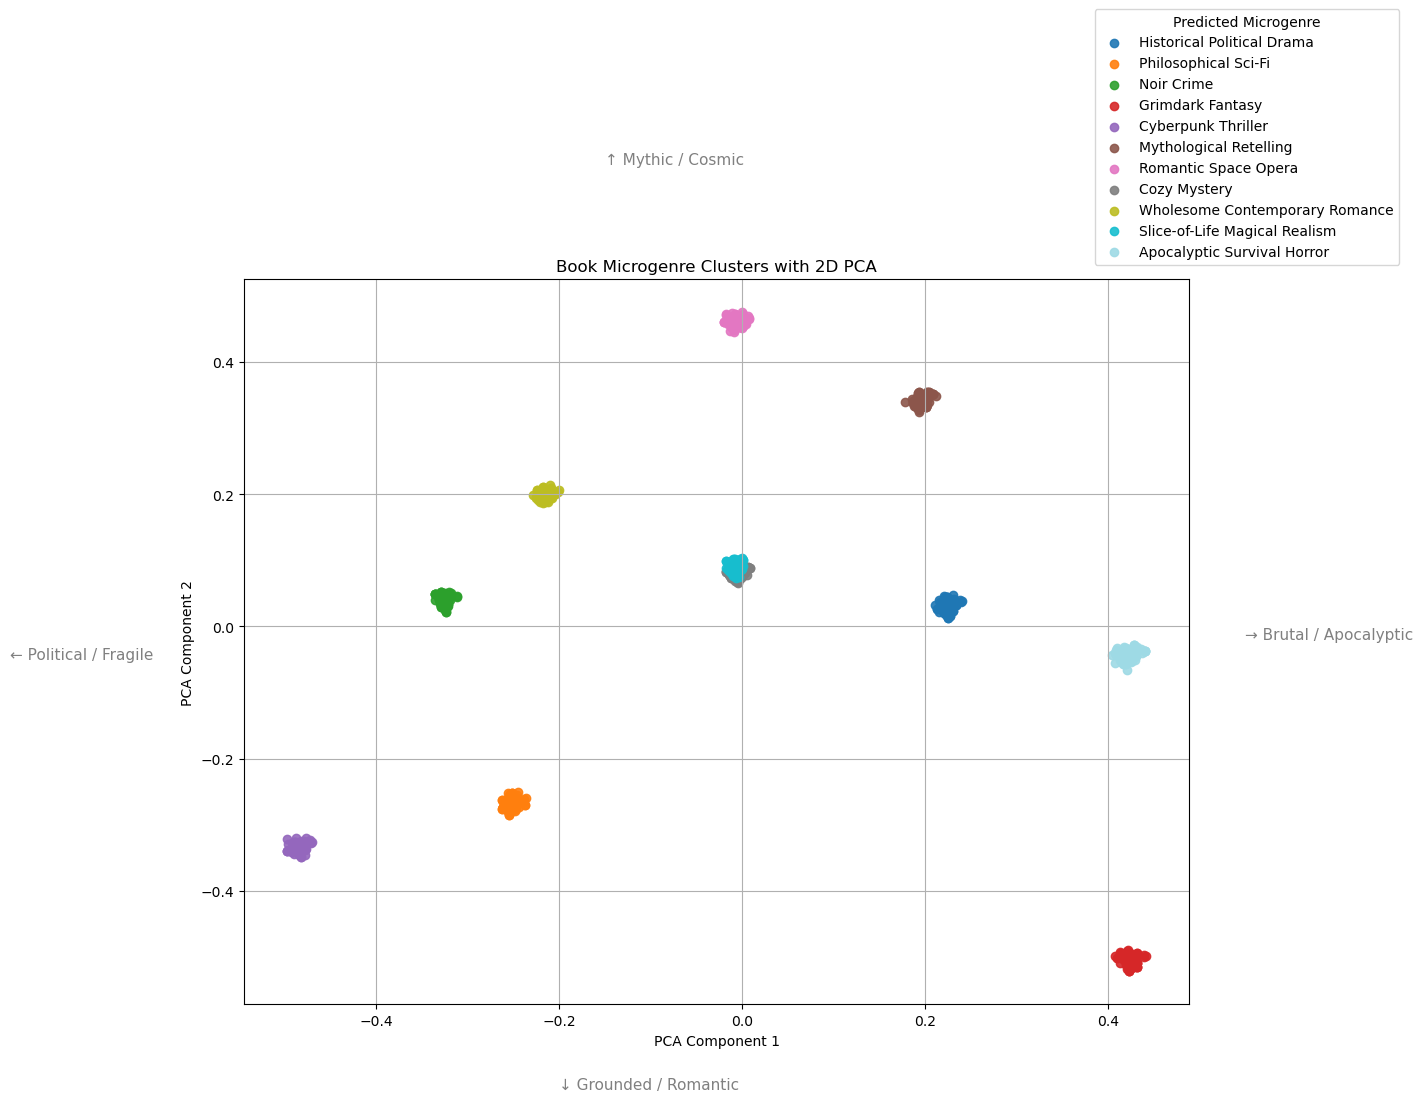

In [140]:
# plotting/visualizing
colormap = plt.get_cmap('tab20', num_clusters)
colors = [colormap(i) for i in range(num_clusters)]
plt.figure(figsize=(15, 12))
for cluster_num in range(num_clusters):
    cluster_points = X_reduced[df['cluster'] == cluster_num]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_num], label=cluster_to_microgenre[cluster_num], alpha=0.9)
        
plt.title('Book Microgenre Clusters with 2D PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# Adding directional annotations to the PCA plot
plt.annotate('→ Brutal / Apocalyptic', xy=(0.42, 0), xytext=(0.55, -0.02), fontsize=11, color='gray')
plt.annotate('← Political / Fragile', xy=(-0.5, 0), xytext=(-0.8, -0.05), fontsize=11, color='gray')
plt.annotate('↑ Mythic / Cosmic', xy=(0, 0.5), xytext=(-0.15, 0.7), fontsize=11, color='gray')
plt.annotate('↓ Grounded / Romantic', xy=(0, -0.5), xytext=(-0.2, -0.7), fontsize=11, color='gray')
plt.legend(title='Predicted Microgenre', bbox_to_anchor=(0.90, 1.02), loc='lower left', borderaxespad=0.)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.grid(True)
plt.show();

In [11]:
component_1 = pca_reduction.components_[0]
component_2 = pca_reduction.components_[1]
# Get feature names (i.e., words)
words = vectorizer.get_feature_names_out()
# Top 15 influential words for each component
top_indices_1 = np.argsort(component_1)[-15:]
top_indices_2 = np.argsort(component_2)[-15:]

print("Top words for PCA Component 1:")
print(words[top_indices_1][::-1])

print("\nTop words for PCA Component 2:")
print(words[top_indices_2][::-1])


Top words for PCA Component 1:
['survive' 'fall' 'world' 'fights' 'civilization' 'broken' 'brutal'
 'power' 'realm' 'betrayal' 'claim' 'bloodshed' 'treacherous' 'courts'
 'rise']

Top words for PCA Component 2:
['ancient' 'love' 'captain' 'stars' 'empires' 'rival' 'battling' 'gods'
 'reimagined' 'tale' 'monsters' 'world' 'finds' 'unexpected' 'place']
